   #                                        **WhatsApp Group Chat Analysis using Python**



### <font color=green> Have you ever wondered how much you and your friends chat in your WhatsApp group? Or which member is the most active, and when your group is most active? Thanks to Python and its powerful data analysis libraries, we can now easily extract insights from our WhatsApp group chat logs. In this notebook, we'll explore how to load, clean, and analyze WhatsApp group chat data using Python. We'll visualize and interpret our findings, gaining valuable insights into our group's communication patterns. Get ready to discover who talks the most, when we're most chatty, and what words we use the most in our WhatsApp group chat!

Note: Some cells were deliberatley not run for number privacy reasons.</font>



Let’s import all these libraries :

In [11]:
import re
import regex
import pandas as pd
import numpy as np
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from os import path
from PIL import Image
import datetime
import seaborn as sns
from seaborn import *
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In order to analyze a WhatsApp group chat using Python, we first need to export the chat and save the file. Once we have the chat file, we can move on to step 2, where we will create a Python program to extract relevant information such as the date, author, time, and messages from the chat file. We will then use this information to create a pandas dataframe and perform any necessary data preprocessing before moving on to the analysis steps.

### Let’s extract all the useful info. from chat file using regex :

In [12]:
### code to extract Date from chat file
def startsWithDateAndTime(s):
    pattern = r'^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]? (AM|PM|am|pm)? -'
    result = re.match(pattern, s)
    if result:
        return True
    return False


In [13]:
### Regex pattern to extract username of Author.
def FindAuthor(s):
    s= s.split(":")
    if len(s)==2:
        return True
    else:
        return False

In [14]:
### Extracting Date, Time, Author and message from the chat file.
def getDataPointandroid(line):
    splitLine = line.split(' - ')
    dateTime = splitLine[0]
    date, time = dateTime.split(', ')
    message = ' '.join(splitLine[1:])
    author = None  # Define author variable before assignment
    if FindAuthor(message):
        splitMessage = message.split(':')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    return date, time, author, message


In [15]:
def split_count(text):
    emoji_list = []
    emojis_iter = map(lambda y:y, emoji.UNICODE_EMOJI['en'].keys())
    regex_set = re.compile('|'.join(re.escape(em) for em in emojis_iter))
    emoji_list = regex_set.findall(text)
    return len(emoji_list)
    
    

In [16]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
### Uploading exported chat file
conversationPath = r'C:\Users\USER\Downloads\WhatsApp Chat with Main BLEST CHOIR🎼🎤🎹🎻🎸🎺🎷🥁🎧.txt' # chat file
with open(conversationPath, encoding="utf-8") as fp:
    ### Skipping first line of the file because contains information related to something about end-to-end encryption
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPointandroid(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
### changing datatype of "Date" column.
df["Date"] = pd.to_datetime(df["Date"])

### Let's take a look at our newly created dataset.

In [17]:
df.head(4)

Date     Time      Author  \
0 2018-12-28  8:51 PM        None   
1 2019-06-15  2:58 PM  Gt Tofunmi   
2 2019-06-15  3:00 PM  Gt Tofunmi   
3 2019-06-15  8:41 PM  Gt Tofunmi   

                                             Message  
0                                     You were added  
1   Hello people.. Good afternoon Howdy do... So ...  
2   For anymore info, you can send me a private m...  
3   Hello people.. Good afternoon Howdy do... So ...

### Next, we'll examine some basic information about our dataset and clean it up as needed.

In [39]:
### Checking shape of dataset.
df.shape
### Checking basic information of dataset
df.info()
### Checking no. of null values in dataset
df.isnull().sum()
### Checking head part of dataset
df.head(50)
### Checking tail part of dataset
df.tail(50)
### Droping Nan values from dataset
df = df.dropna()
df = df.reset_index(drop=True)
df.shape
### Checking no. of authors of group
#df['Author'].nunique()
### Checking authors of group
#df['Author'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18660 entries, 0 to 18659
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               18660 non-null  datetime64[ns]
 1   Day                18660 non-null  object        
 2   Time               18660 non-null  datetime64[ns]
 3   Author             18660 non-null  object        
 4   Message            18660 non-null  object        
 5   Letters            18660 non-null  int64         
 6   Words              18660 non-null  int64         
 7   Url_Count          18660 non-null  int64         
 8   Media_Count        18660 non-null  int64         
 9   Hours              18660 non-null  int64         
 10  Msg_count          18660 non-null  int64         
 11  Year               18660 non-null  int64         
 12  Month              18660 non-null  object        
 13  Month_Year         18660 non-null  object        
 14  Msg_co

(18660, 15)

### Next, we'll work on analyzing our dataset and extracting useful information from it:

In [19]:
### Adding one more column of "Day" for better analysis, here we use datetime library which help us to do this task easily.
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thursday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}
df['Day'] = df['Date'].dt.weekday.map(weeks)

# Reordering the columns
df = df[['Date', 'Day', 'Time', 'Author', 'Message']]

# Changing the datatype of the Day column to category
df['Day'] = df['Day'].astype('category')

# Counting number of letters in each message
df['Letters'] = df['Message'].apply(lambda s: len(s))

# Counting number of words in each message
df['Words'] = df['Message'].apply(lambda s: len(s.split(' ')))

# Function to count number of links in dataset, it will add extra column and store information in it.
URL_PATTERN = r'(https?://\S+)'
df['Url_Count'] = df['Message'].apply(lambda x: re.findall(URL_PATTERN, x)).str.len()
links = np.sum(df.Url_Count)

# Function to count number of media in chat.
MEDIA_PATTERN = r'<Media omitted>'
df['Media_Count'] = df['Message'].apply(lambda x: re.findall(MEDIA_PATTERN, x)).str.len()
media = np.sum(df.Media_Count)

# Print the updated dataset
df.head(3)

Date       Day     Time      Author  \
0 2019-06-15  Saturday  2:58 PM  Gt Tofunmi   
1 2019-06-15  Saturday  3:00 PM  Gt Tofunmi   
2 2019-06-15  Saturday  8:41 PM  Gt Tofunmi   

                                             Message  Letters  Words  \
0   Hello people.. Good afternoon Howdy do... So ...      922    167   
1   For anymore info, you can send me a private m...       52     11   
2   Hello people.. Good afternoon Howdy do... So ...     1076    196   

   Url_Count  Media_Count  
0          0            0  
1          0            0  
2          0            0

### Let's start by extracting some basic statistics from the dataset.

In [20]:
total_messages = df.shape[0]
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
links = np.sum(df.Url_Count)
print('Group Chatting Stats : ')
print('Total Number of Messages : {}'.format(total_messages))

Group Chatting Stats : 
Total Number of Messages : 18660


### Extracting basic statistics of each user :

In [41]:
l = df.Author.unique()
for i in range(len(l)):
    ### Filtering out messages of particular user
    req_df = df[df["Author"] == l[i]]

    ### req_df will contain messages of only one particular user
    #-#print(f'--> Stats of {l[i]} <-- ')

    ### shape will print number of rows which indirectly means the number of messages
    #-# print('Total Message Sent : ', req_df.shape[0])

    ### Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
    words_per_message = (np.sum(req_df['Words']))/req_df.shape[0]
    w_p_m = ("%.3f" % round(words_per_message, 2))  
    #-# print('Average Words per Message : ', w_p_m)

    ### media conists of media messages
    media = sum(req_df["Media_Count"])
    #-#print('Total Media Message Sent : ', media)

    ### links consist of total links
    links = sum(req_df["Url_Count"])
    #-#print('Total Links Sent : ', links)   
    #-#print()
    #-#print('----------------------------------------------------------n')


### Next, we'll create a word cloud to visualize the most commonly used words in the chat.

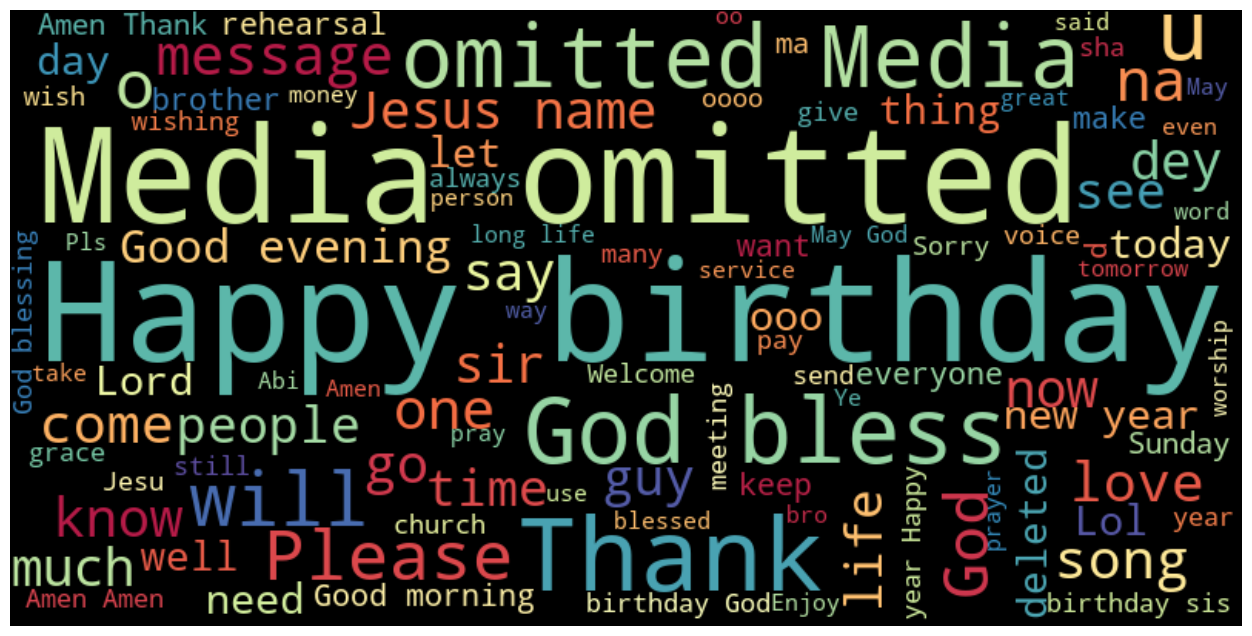

In [22]:
text = " ".join(review for review in df.Message)

# Define a custom color map
color_map = plt.cm.Spectral

# Create the word cloud object with custom parameters
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="black", 
                      colormap=color_map,
                      max_words=100, width=800, height=400)

# Generate the word cloud
wordcloud.generate(text)

# Plot the word cloud
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Let’s print the total no. of messages sent by each user : 

In [42]:
# Creates a list of unique Authors
authors = df.Author.unique()

# Sort the authors by the number of messages they sent
authors_sorted = sorted(authors, key=lambda x: df[df['Author'] == x].shape[0], reverse=True)

# Print the sorted author names and their message counts
for author in authors_sorted:
    # Filter out messages of a particular author
    req_df = df[df['Author'] == author]
    # Print the author name and message count
    #-#print(f'{author} -> {req_df.shape[0]}')


### We'll now print out the count of messages sent on each day of the week for further analysis.

In [24]:
l = df.Day.unique()

for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["Day"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Saturday   ->   3231
Sunday   ->   3485
Thursday   ->   2345
Friday   ->   2639
Tuesday   ->   2480
Monday   ->   2279
Wednesday   ->   2201


### Next, we'll determine the author who sent the most messages in the group.

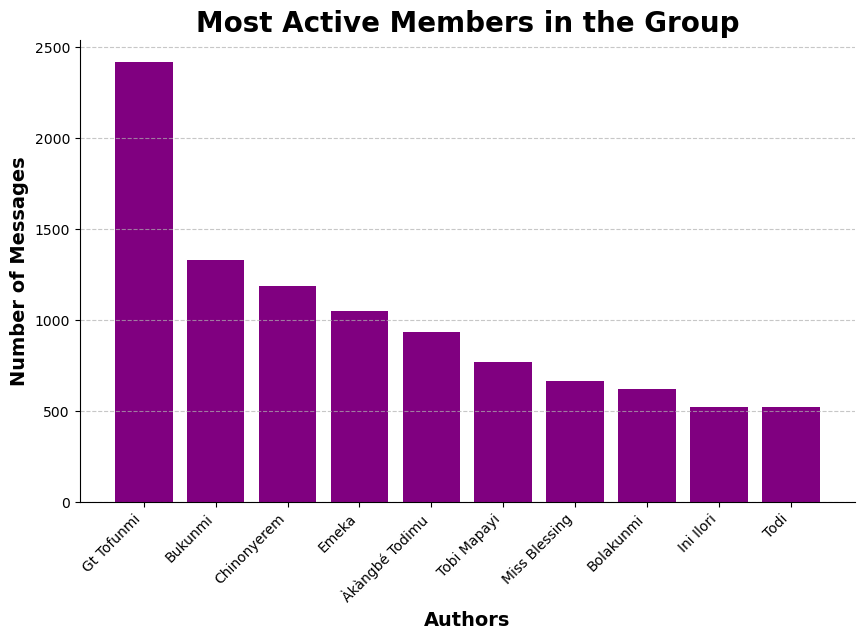

In [25]:
plt.figure(figsize=(10,6))

# Get the counts of messages by author
mostly_active = df['Author'].value_counts()

# Get the top 10 most active authors
m_a = mostly_active.head(10)

# Plot the bar chart
bars = m_a.index
x_pos = np.arange(len(bars))
plt.bar(x_pos, m_a.values, color='purple')

# Add labels and titles
plt.xlabel('Authors', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Number of Messages', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Most Active Members in the Group', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Set the x-tick labels to the author names
plt.xticks(x_pos, bars, rotation=45, ha='right')

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a horizontal grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Let's determine which day of the week had the most activity in terms of messages sent.

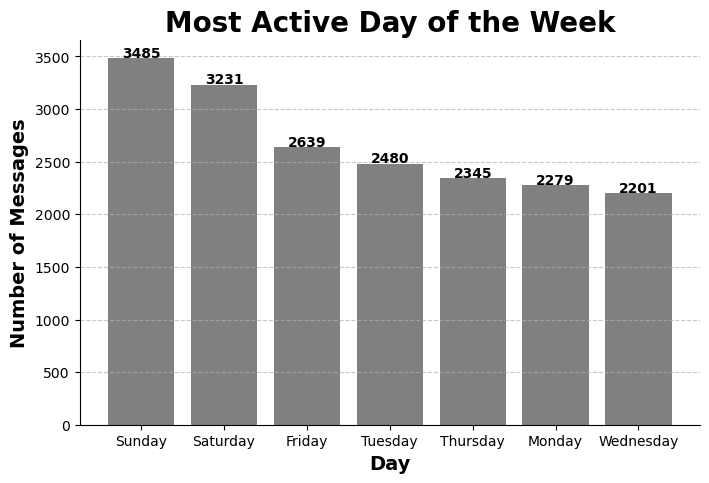

In [26]:
### Mostly Active day in the Group

plt.figure(figsize=(8,5))

# Get the counts of messages by day
df['Day'] = df['Date'].dt.day_name()
active_day = df['Day'].value_counts()

# Get the top 10 most active days
a_d = active_day.head(10)

# Plot the bar chart
bars = a_d.index
plt.bar(bars, a_d.values, color='grey')

# Add labels and titles
plt.xlabel('Day', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Number of Messages', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Most Active Day of the Week', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Add value labels to each bar
for i, v in enumerate(a_d.values):
    plt.text(i, v+10, str(v), ha='center', fontweight='bold')

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a horizontal grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Let's now identify who in the group used the most words throughout the conversation - after all, words are considered one of the most powerful weapons in the world!

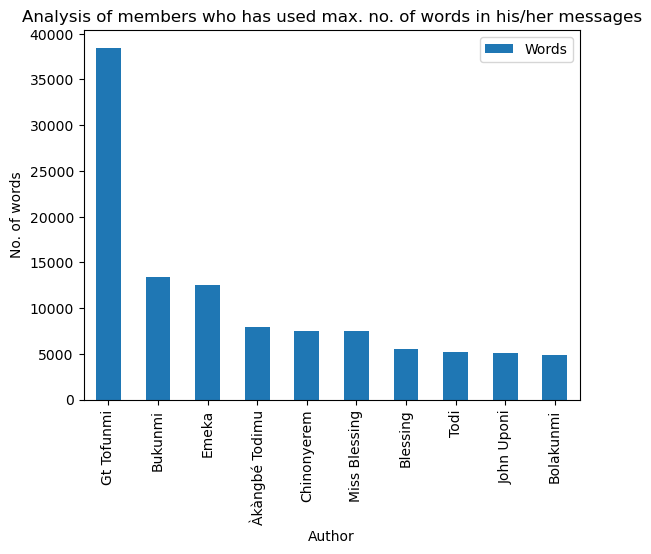

In [27]:
max_words = df[['Author','Words']].groupby('Author').sum()
m_w = max_words.sort_values('Words',ascending=False).head(10)
bars = m_w.index
x_pos = np.arange(len(bars))
m_w.plot.bar(rot=90)
plt.xlabel('Author')
plt.ylabel('No. of words')
plt.title('Analysis of members who has used max. no. of words in his/her messages')
plt.xticks(x_pos, bars)
plt.show()

### Let’s check the time whenever the group was highly active :

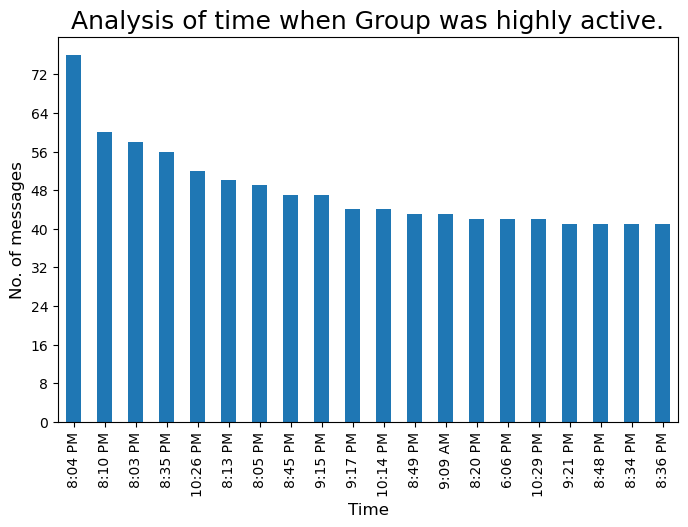

In [28]:
### Time whenever our group is highly active
plt.figure(figsize=(8,5))
t = df['Time'].value_counts().head(20)
tx = t.plot.bar()
tx.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when Group was highly active.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

### Let’s check the most suitable hour of the day whenever there will be more chances of getting a response from group members


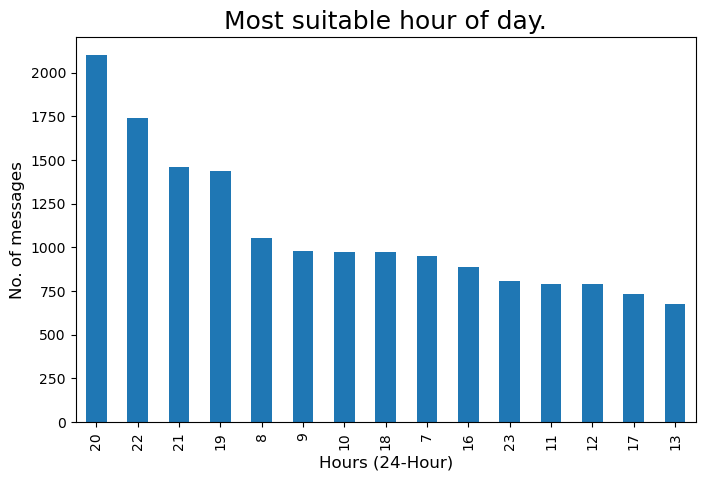

In [29]:
### Most suitable hour of day, whenever there will more chances of getting responce from group members.
df['Time'] = pd.to_datetime(df['Time'])
df['Hours'] = df['Time'].dt.hour
plt.figure(figsize=(8,5))
std_time = df['Hours'].value_counts().head(15)
s_T = std_time.plot.bar()
s_T.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Hours (24-Hour)',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Most suitable hour of day.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

### Next, we'll create a word cloud of the top 10 most active members in the group, to see which words they used most frequently.

--- Author :  Gt Tofunmi --- 
--- Author :  Bukunmi --- 
--- Author :  Chinonyerem --- 
--- Author :  Emeka --- 
--- Author :  Àkàngbé Todimu --- 
--- Author :  Tobi Mapayi --- 
--- Author :  Miss Blessing --- 
--- Author :  Bolakunmi --- 
--- Author :  Ini Ilori --- 
--- Author :  Todi --- 


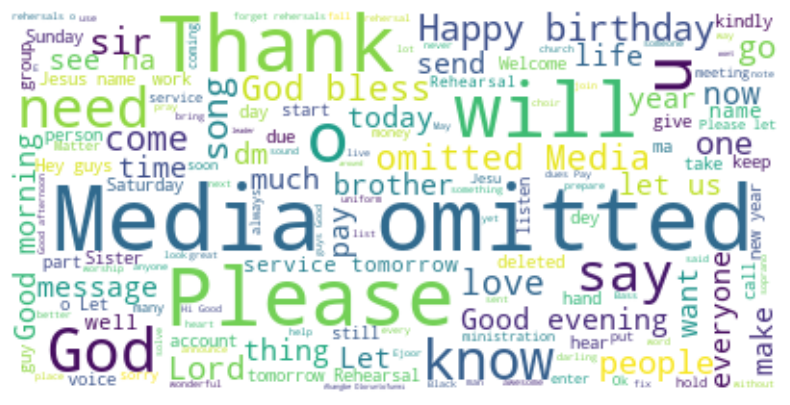

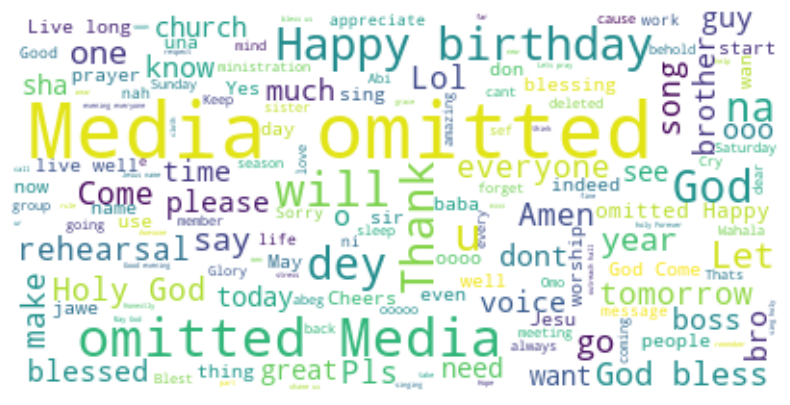

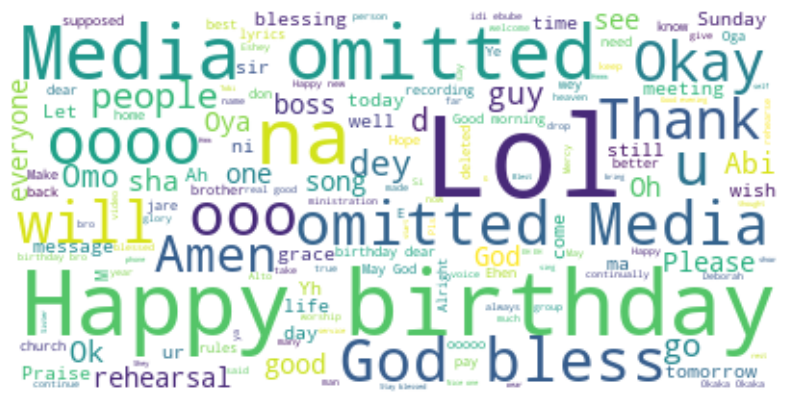

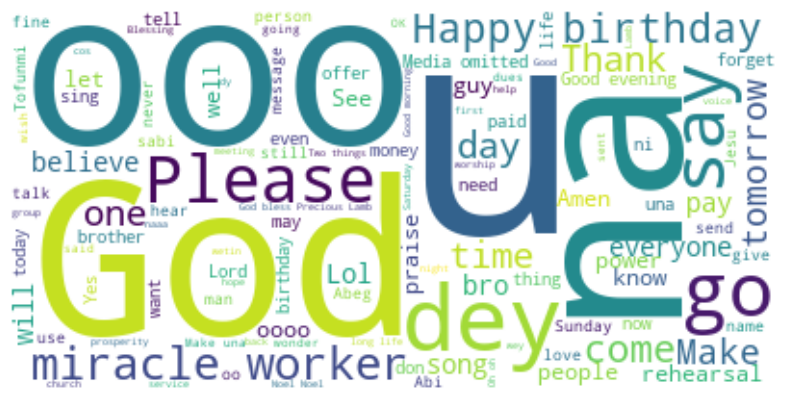

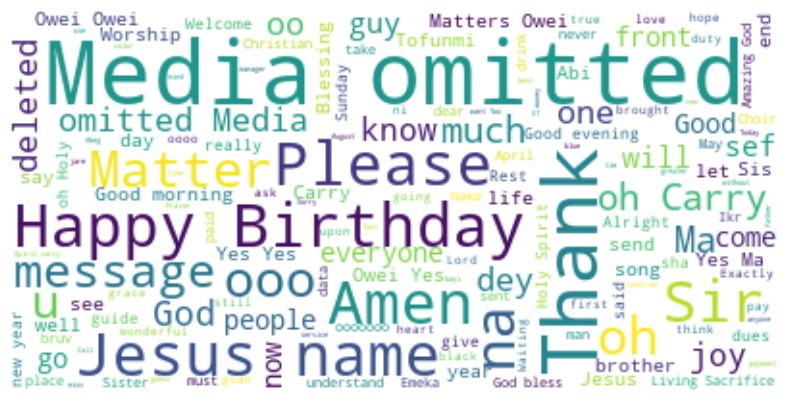

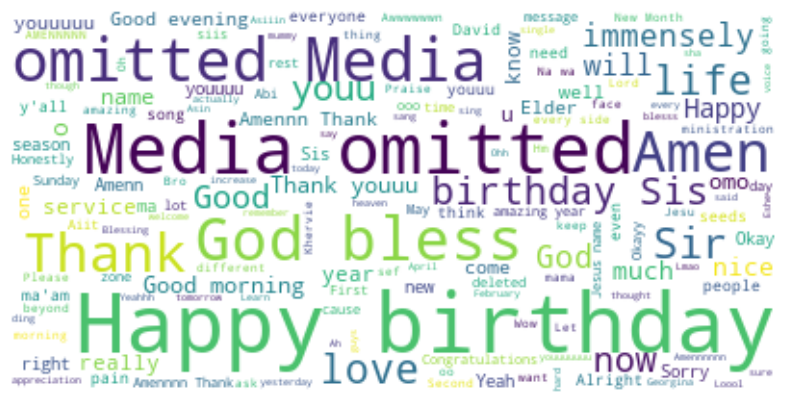

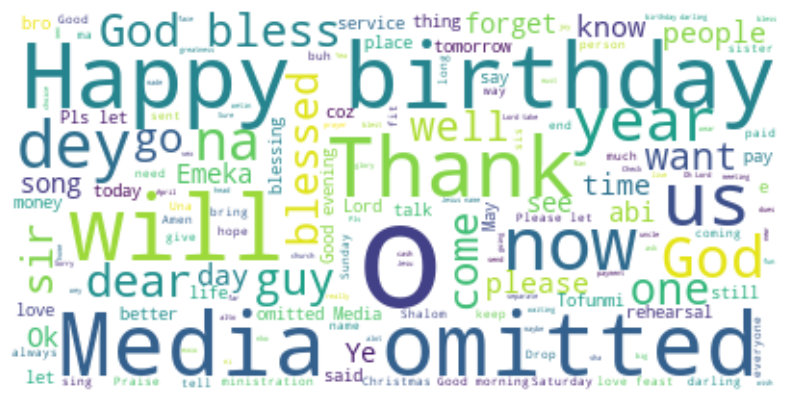

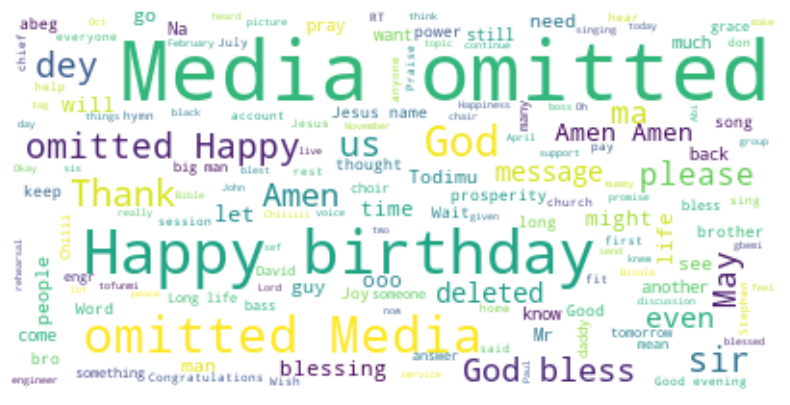

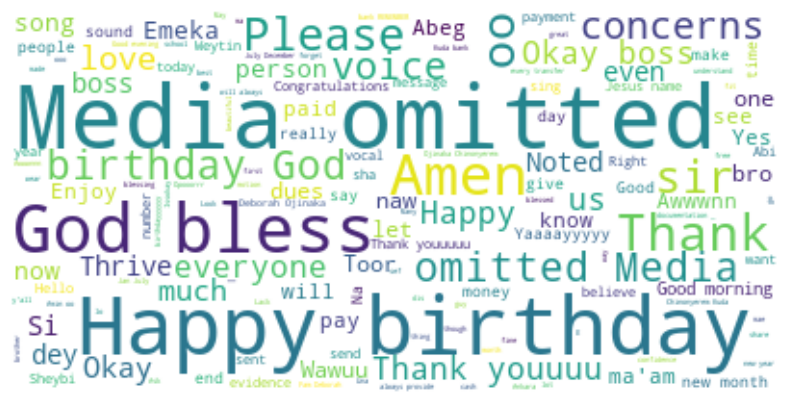

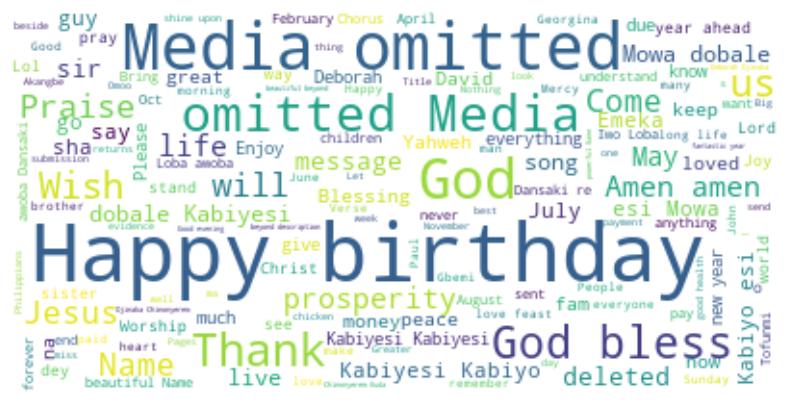

In [44]:
active_m = m_a.index
for i in range(len(active_m)) :
    # Filtering out messages of particular user
    m_chat = df[df["Author"] == active_m[i]]
    print(f'--- Author :  {active_m[i]} --- ')
    # Word Cloud of mostly used word in our Group
    msg = ' '.join(x for x in m_chat.Message)
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=150).generate(msg)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #-#plt.show()
   #-# print('____________________________________________________________________________________n')


### Date on which our Group was highly active.

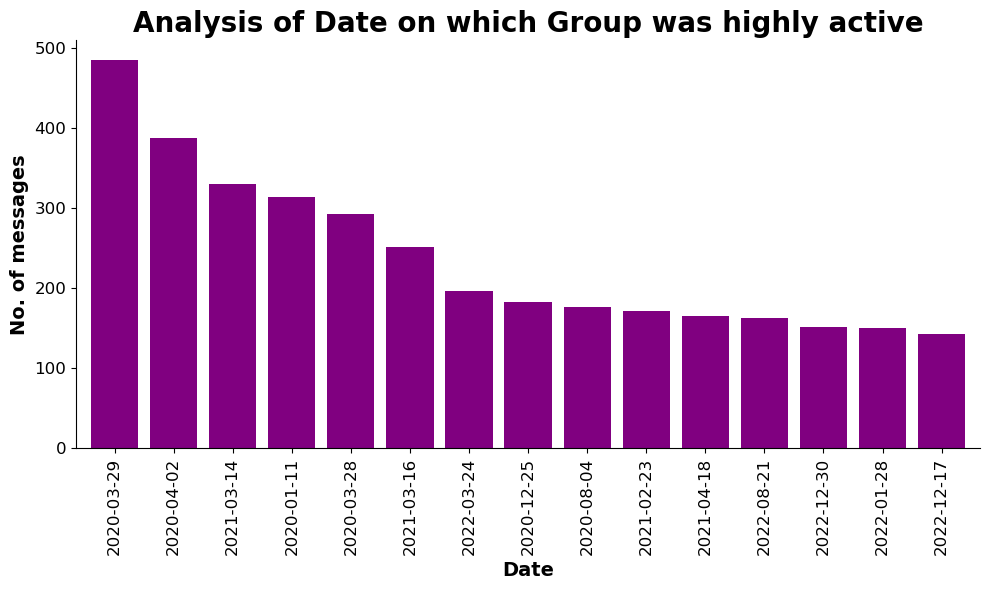

In [31]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract just the date component
df['Date'] = df['Date'].dt.date

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = df['Date'].value_counts().head(15).plot.bar(width=0.8, color='purple')
ax.set_xlabel('Date', fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel('No. of messages', fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_title('Analysis of Date on which Group was highly active', fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tight_layout()
plt.show()

### We'll now create a time series plot showing the number of messages sent over time.

In [32]:
z = df['Date'].value_counts() 
z1 = z.to_dict() #converts to dictionary
df['Msg_count'] = df['Date'].map(z1)
### Timeseries plot 
plt.figure(figsize=(20,20))
fig = px.line(x=df['Date'],y=df['Msg_count'])
fig.update_layout(title='Analysis of number of messages using TimeSeries plot.',
                  xaxis_title='Month',
                  yaxis_title='No. of Messages')
fig.update_xaxes(nticks=20)
fig.show()

<Figure size 2000x2000 with 0 Axes>

### Let’s create a separate column for Month and Year for better analysis :

In [33]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Mon'] = df['Date'].dt.month
months = {
     1 : 'Jan',
     2 : 'Feb',
     3 : 'Mar',
     4 : 'Apr',
     5 : 'May',
     6 : 'Jun',
     7 : 'Jul',
     8 : 'Aug',
     9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}
df['Month'] = df['Mon'].map(months)
df.drop('Mon',axis=1,inplace=True)

### Let’s check mostly active month :

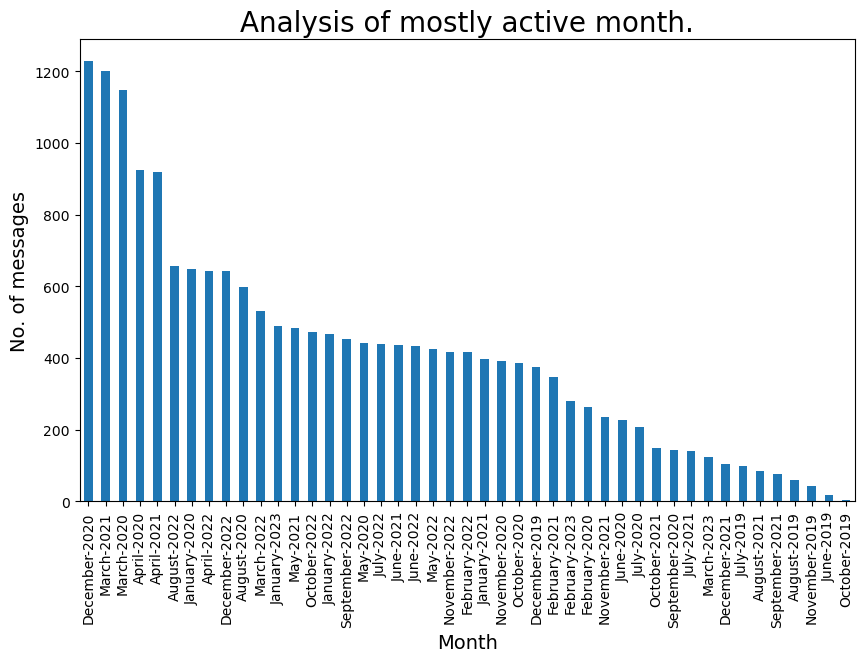

In [34]:
### Mostly Active month 
plt.figure(figsize=(10,6))
df['Month_Year'] = df['Date'].apply(lambda x: x.strftime('%B-%Y'))
active_month = df['Month_Year'].value_counts()
a_m = active_month
a_m.plot.bar()
plt.xlabel('Month',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of mostly active month.',fontdict={'fontsize': 20,
        'fontweight': 8})
plt.show()

### We will create a line plot to analyze the month with the highest activity.

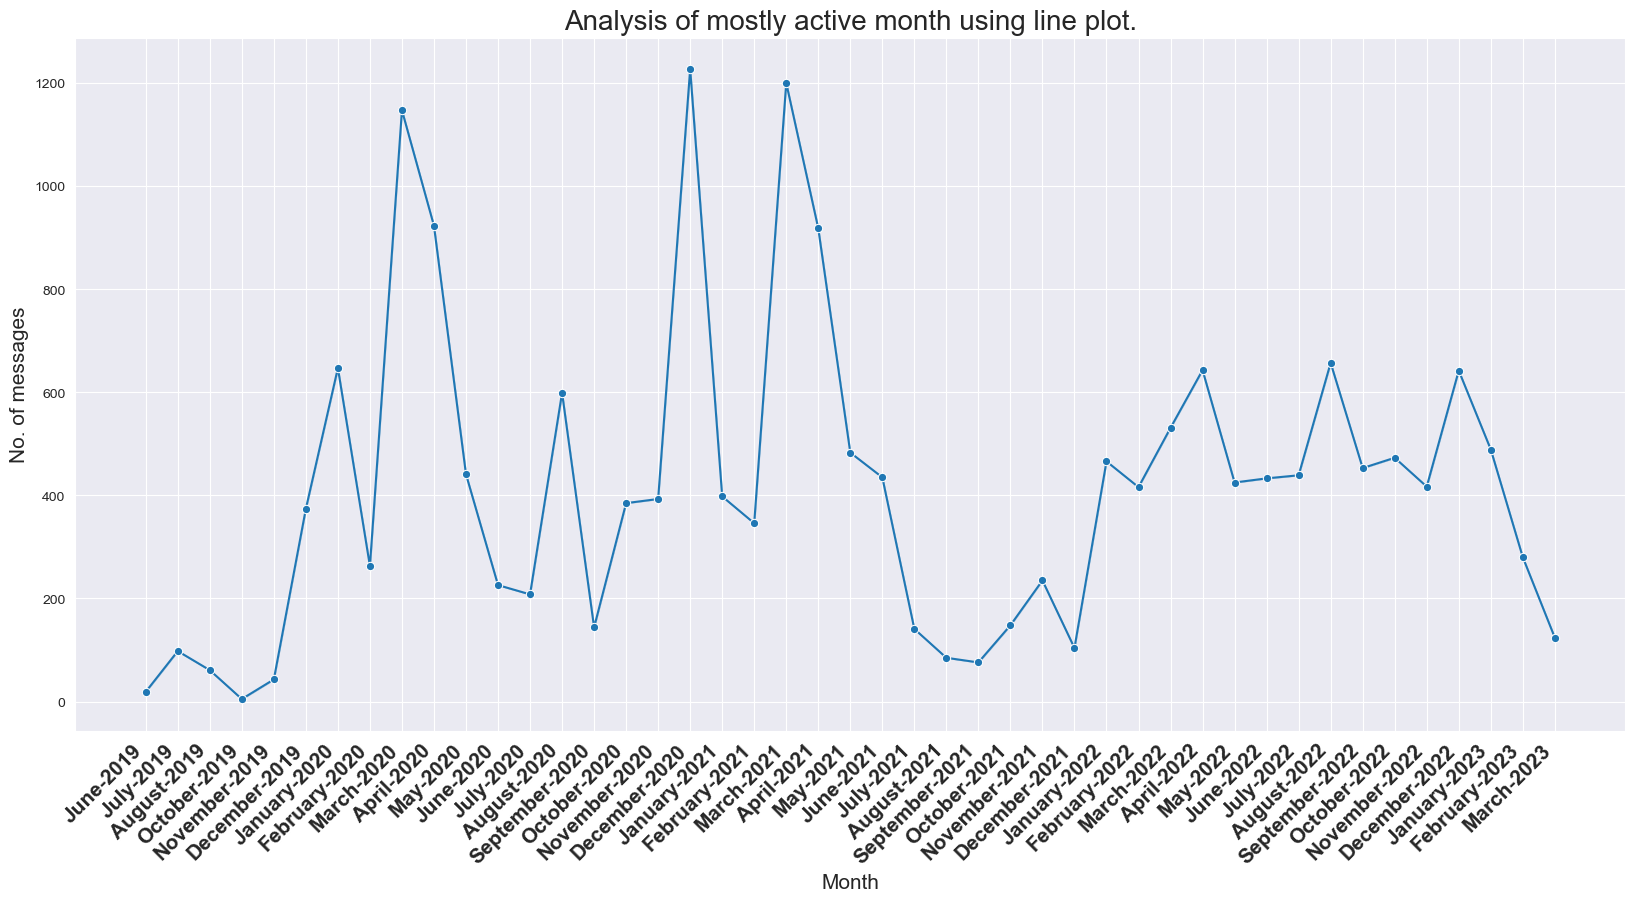

In [35]:
### Let’s analyze the most active month using a line plot : 
z = df['Month_Year'].value_counts() 
z1 = z.to_dict() #converts to dictionary
df['Msg_count_monthly'] = df['Month_Year'].map(z1)
plt.figure(figsize=(20,9))
sns.set_style("darkgrid")
sns.lineplot(data=df,x='Month_Year',y='Msg_count_monthly',markers=True,marker='o')
plt.xlabel('Month',fontdict={'fontsize': 15,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 15,'fontweight': 10})
plt.title('Analysis of mostly active month using line plot.',fontdict={'fontsize': 20,'fontweight': 8})

# Customize the x-axis tick labels
plt.xticks(rotation=45, ha='right', fontsize=15, fontweight='bold')
plt.show()

### Let’s analyze the total message per year 

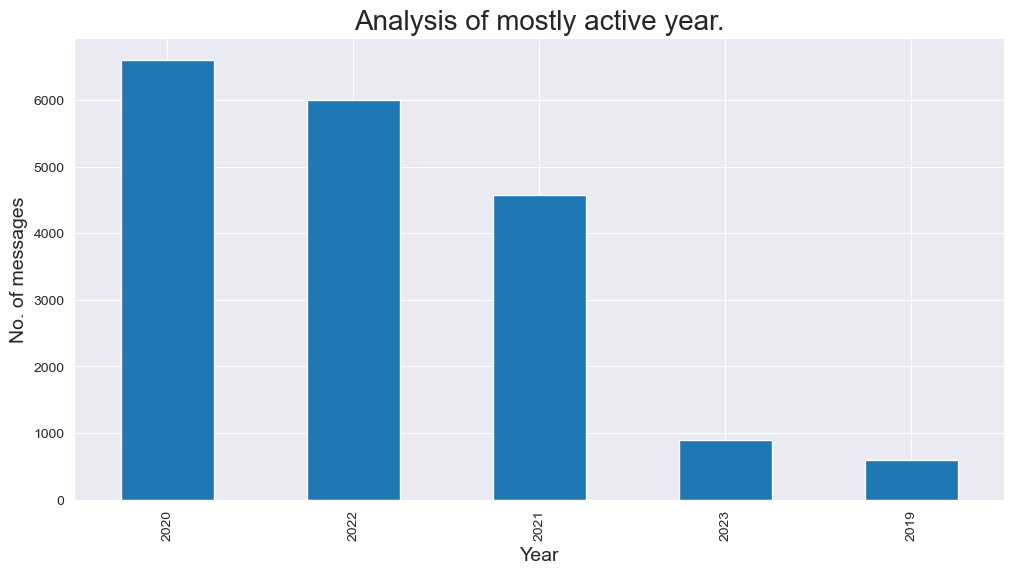

In [36]:
### Total message per year
### As we analyse that the group was created in mid 2019, thats why number of messages in 2019 is less.
plt.figure(figsize=(12,6))
active_month = df['Year'].value_counts()
a_m = active_month
a_m.plot.bar()
plt.xlabel('Year',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of mostly active year.',fontdict={'fontsize': 20,'fontweight': 8})
plt.show()

### We will create a heatmap to analyze the highly active day with respect to time.

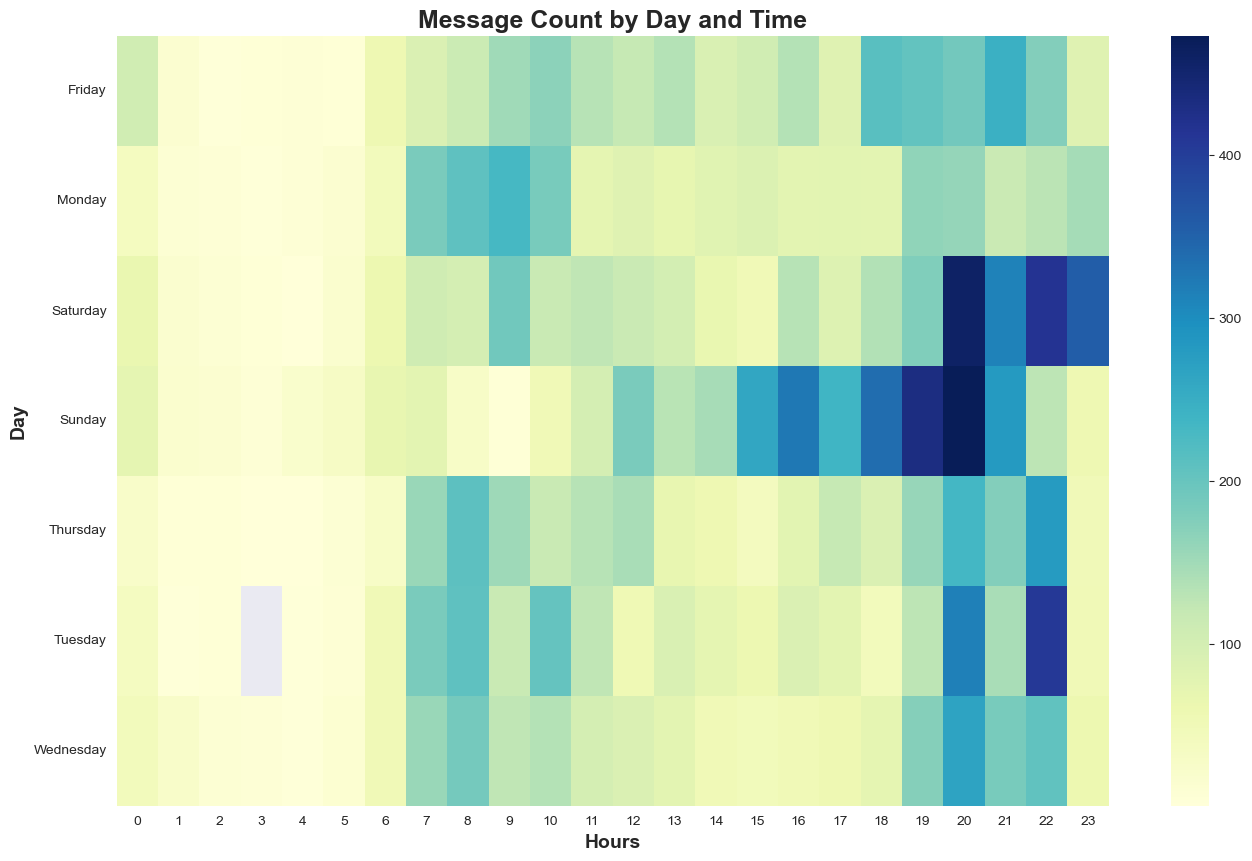

In [37]:
# Assuming the data is stored in a dataframe called df
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day_name()

# Create a pivot table to restructure the data
pivot_table = pd.pivot_table(df, values='Message', index=['Day'], columns=['Hours'], aggfunc=np.count_nonzero)

# Create a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Message Count by Day and Time', fontdict={'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Hours', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Day', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()